In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-linear-regression/train.csv
/kaggle/input/random-linear-regression/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/random-linear-regression/train.csv")

In [3]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
train.tail(5)

,x,y
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685
699,97.0,94.975266


In [5]:
train.sample(5)

,x,y
403,33.0,34.764416
240,29.0,26.334648
337,59.0,62.038116
395,27.0,23.476510
134,74.0,70.775498


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [7]:
train.shape

(700, 2)

In [8]:
# data cleaning/ data wrangling/ data munging
# 1. null values findout 
# 2. outliers detect & remove 

In [9]:
train.isnull().count()

x    700
y    700
dtype: int64

In [10]:
train["x"].isnull().count()

700

In [11]:
train["y"].isnull().count()

700

In [12]:
train["x"].value_counts()

58.000000      16
49.000000      14
16.000000      13
24.000000      13
25.000000      13
               ..
63.000000       3
82.000000       2
69.000000       2
40.000000       2
3530.157369     1
Name: x, Length: 102, dtype: int64

In [13]:
train["y"].value_counts()

21.549452     1
38.462137     1
1.576584      1
17.461814     1
2.116113      1
             ..
58.372660     1
87.220597     1
102.496786    1
43.883143     1
94.975266     1
Name: y, Length: 699, dtype: int64

In [14]:
# EDA

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  


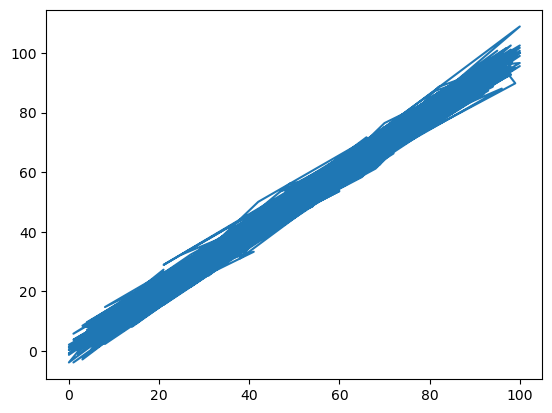

In [15]:
import matplotlib.pyplot as plt
plt.plot("x","y", data=train)

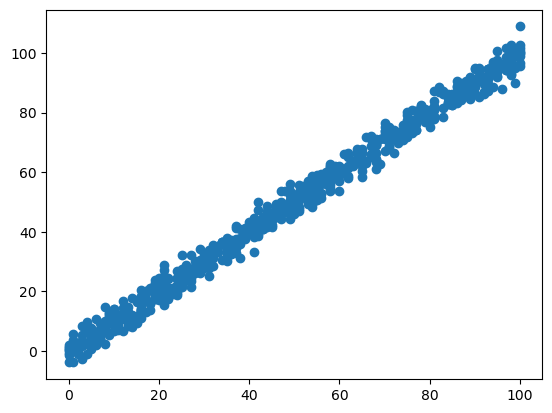

In [16]:
plt.scatter("x","y", data=train)

<BarContainer object of 700 artists>

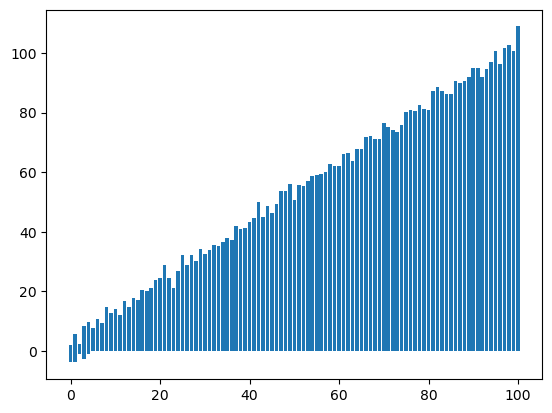

In [17]:
plt.bar("x","y", data=train)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f26b7d18910>,
 'caps': [<matplotlib.lines.Line2D at 0x7f26b7d18f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f26b7db5c90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f26b7d23590>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f26b7d238d0>],
 'means': []}

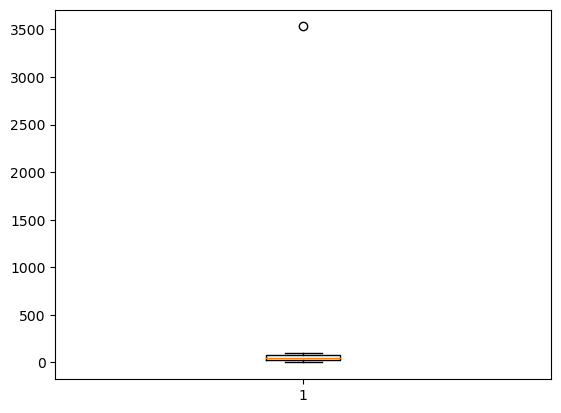

In [18]:
plt.boxplot("x", data=train)

In [19]:
train = train.dropna()

In [20]:
train.shape

(699, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f26b7cdcf50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f26b7ce4650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f26b7cdcd90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f26b7ce4d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f26b7cf3090>],
 'means': []}

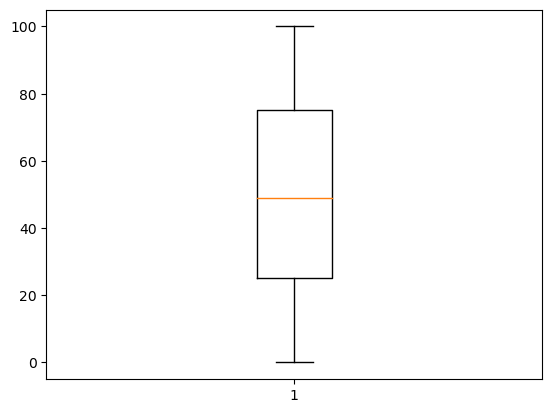

In [21]:
plt.boxplot("x", data=train)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f26b7c5b950>,
 'caps': [<matplotlib.lines.Line2D at 0x7f26b7c60190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f26b7c5b910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f26b7c60850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f26b7c60b90>],
 'means': []}

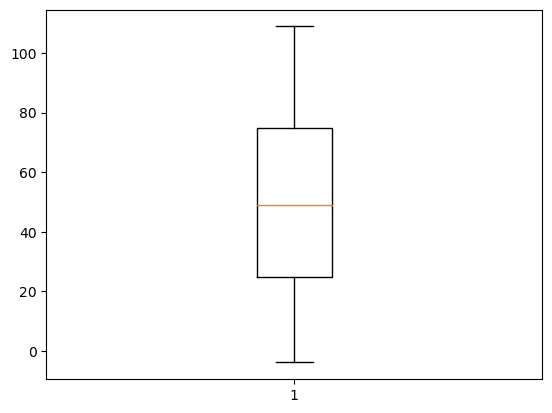

In [22]:
plt.boxplot("y", data=train)

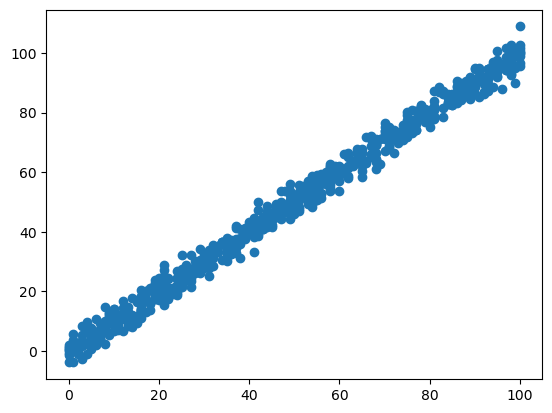

In [23]:
plt.scatter("x","y", data=train)

In [24]:
test = pd.read_csv("/kaggle/input/random-linear-regression/test.csv")

In [25]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [26]:
test.tail(5)

,x,y
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171
299,47,52.459467


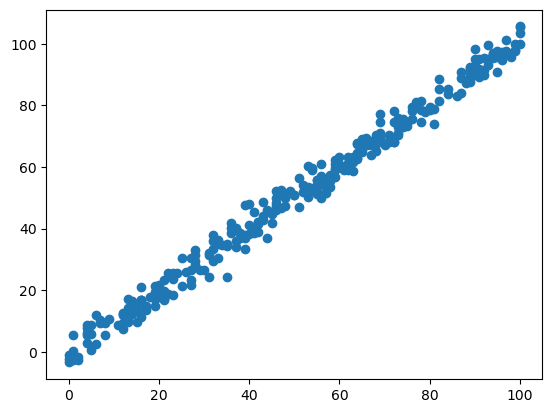

In [27]:
plt.scatter("x","y", data=test)

In [28]:
# model
# 1. simple linear regression 

In [29]:
from sklearn import linear_model

In [30]:
slr =  linear_model.LinearRegression()

In [31]:
x_train = np.array(train.iloc[:, :-1].values)
y_train = np.array(train.iloc[:, 1].values)
x_test = np.array(test.iloc[:, :-1].values)
y_test = np.array(test.iloc[:, 1].values)

In [32]:
slr.fit(x_train,y_train)

LinearRegression()

In [33]:
# y = mx+c
#_coeff (coefficient/slope/m)
#_intercept (bias/intercept)

In [34]:
slr.coef_

array([1.00065638])

In [35]:
slr.intercept_

-0.10726546430097272

In [36]:
# y = 1.00065638 * x -0.107265

In [37]:
y_pred = slr.predict(x_test)

In [38]:
accuracy = slr.score(x_test,y_test)

In [39]:
print(accuracy)

0.9888014444327563


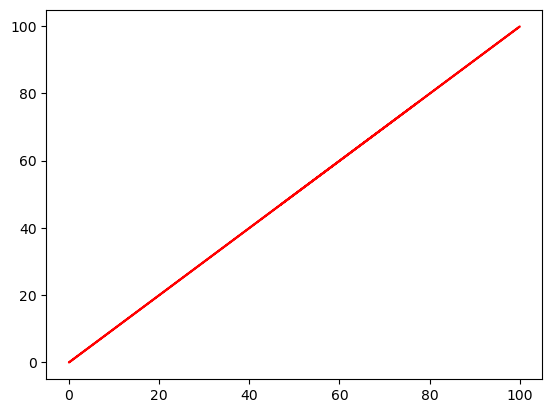

In [40]:
plt.plot(x_test, y_pred, color = 'red')
plt.show()

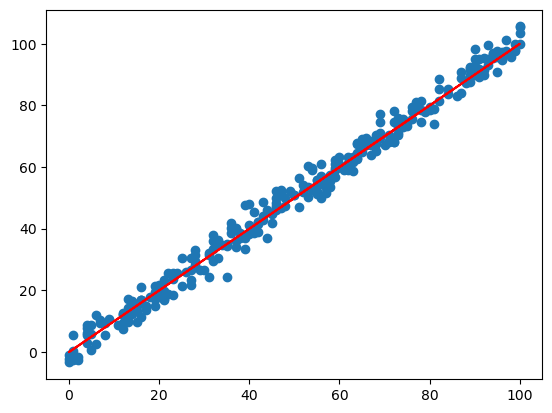

In [41]:
plt.scatter("x","y", data=test)
plt.plot(x_test, y_pred, color = 'red')
plt.show()

In [42]:
from sklearn.metrics import mean_absolute_error

In [43]:
mean_absolute_error(y_test,y_pred)

2.415771850041258

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
mean_squared_error(y_test, y_pred)

9.432922192039305

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_score(y_test, y_pred)

0.9888014444327563